In [3]:
import numpy as np
import math

import random
random.seed()

class WeightedUndirectedMatrixGraph:
    
    # initialize a weighted undirected adjacency-matrix graph with n nodes
    #
    def __init__(self, n):
        self._num_vertices = n
        self._adj_matrix = np.zeros((n, n))
        for i in range(n-1):
            for j in range(i+1, n):
                self._adj_matrix[i][j] = math.inf
                self._adj_matrix[j][i] = math.inf
    
    # returns the number of nodes
    #
    def get_num_vertices(self):
        return self._num_vertices
    
    # returns weight of the edge between i and j
    #
    def get_weight(self, i, j):
        return self._adj_matrix[i][j]
    
    # the path is a list of node IDs
    #
    def get_length_of_path(self, path):
        length = 0
        for i in range(len(path) - 1):
            length += self.get_weight(path[i], path[i+1])
        return length
    
    # print the adjacency matrix
    #
    def output(self):
        print(self._adj_matrix)
    
    # assign weight w to the edge between i and j (both ways)
    # i and j must be different, and both within range(n), and w must be zero or positive
    #
    def set_weight(self, i, j, w):
        if i == j or i < 0 or j < 0 or i >= self._num_vertices or j >= self._num_vertices or w < 0:
            print("Warning: Invalid input to the connect method. Ignoring.")
            return
        self._adj_matrix[i][j] = w
        self._adj_matrix[j][i] = w
    
    # assign random weights to all edges
    #
    def randomize(self):
        for i in range(self._num_vertices - 1):
            for j in range(i+1, self._num_vertices):
                random_weight = 2**random.randrange(self._num_vertices // 2)
                random_weight += random.randrange(2**(self._num_vertices // 2) - 1)
                self.set_weight(i, j, random_weight)
    
    # solve the travelling salesman problem (TSP) by brute force
    #
    # this returns the shortest cycle that visits each node exactly once
    # (also referred to as the shortest Hamilton cycle in the graph:
    #  A Hamilton cycle is a cycle that visits each node exactly once.)
    #
    def solve_TSP_brute_force(self):
        unvisited = {i for i in range(self._num_vertices)}
        unvisited.remove(0)  # select node 0 as the initial and final node of the cycle
        
        # helper method that actually solves the TSP
        #
        shortest_cycle, travel_distance = self._TSP_brute_force(0, 0, unvisited)
        print("Brute-force TSP solver done comparing", \
              WeightedUndirectedMatrixGraph._num_attempts, "cycles.")
        WeightedUndirectedMatrixGraph._num_attempts = 0
        
        return shortest_cycle, travel_distance
    
    # unvisited_nodes is the set of unvisited nodes
    # initial_node is the initial node
    # present_node is the node that is presently visited
    #
    # the method returns the (shortest) remaining path
    # and the length (i.e., total weight) of the shortest remaining path
    #
    # the remaining path is written into the list backward, to exploit faster end-of-list
    # operations on a Python list; since this is a cycle in an undirected graph, it does not matter
    #
    def _TSP_brute_force(self, initial_node, present_node, unvisited_nodes):
        
        # if all nodes are visited, go back to the initial node
        #
        if len(unvisited_nodes) == 0:
            
            WeightedUndirectedMatrixGraph._num_attempts += 1
            if WeightedUndirectedMatrixGraph._num_attempts \
            % WeightedUndirectedMatrixGraph._mod_status_output == 0:
                print("\tChecked", WeightedUndirectedMatrixGraph._num_attempts, "cycles.")
                
            return [initial_node, present_node], self.get_weight(initial_node, present_node)
        
        # check which of the optional next nodes yield the shortest remaining path
        #
        else:
            shortest_remaining_weight = math.inf
            shortest_remaining_path = []
            
            unvisited_nodes_copy = {i for i in unvisited_nodes}
            for v in unvisited_nodes_copy:
                unvisited_nodes.remove(v)
                v_path, v_weight = self._TSP_brute_force(initial_node, v, unvisited_nodes)
                v_path.append(present_node)
                v_weight += self.get_weight(v, present_node)
                unvisited_nodes.add(v)
                
                if v_weight < shortest_remaining_weight:
                    shortest_remaining_weight = v_weight
                    shortest_remaining_path = v_path
            return shortest_remaining_path, shortest_remaining_weight
    
    # static variable used to count number of cycles checked by the brute-force solver
    #
    _num_attempts = 0
    _mod_status_output = 2000000

In [4]:
n = 12

g = WeightedUndirectedMatrixGraph(n)
g.randomize()

g.output()

print("\nPath 0 -> 1 -> 2 has the length", g.get_length_of_path([0, 1, 2]))

[[ 0. 40. 32. 24. 38.  9. 52. 39. 29. 35. 88. 60.]
 [40.  0. 21. 39. 28. 49. 69. 61. 45. 38. 53.  5.]
 [32. 21.  0. 50. 24. 59. 32. 40. 55. 38.  5. 24.]
 [24. 39. 50.  0. 71. 63. 27. 53. 14. 29. 14. 35.]
 [38. 28. 24. 71.  0. 46. 30.  6. 52. 14. 10. 13.]
 [ 9. 49. 59. 63. 46.  0. 16. 93. 39. 36. 23. 12.]
 [52. 69. 32. 27. 30. 16.  0. 83. 49. 51. 49. 44.]
 [39. 61. 40. 53.  6. 93. 83.  0. 13. 65. 57. 47.]
 [29. 45. 55. 14. 52. 39. 49. 13.  0. 60. 63. 57.]
 [35. 38. 38. 29. 14. 36. 51. 65. 60.  0. 55. 16.]
 [88. 53.  5. 14. 10. 23. 49. 57. 63. 55.  0. 37.]
 [60.  5. 24. 35. 13. 12. 44. 47. 57. 16. 37.  0.]]

Path 0 -> 1 -> 2 has the length 61.0


In [5]:
import random

# create a random cycle and determine its distance
#
random_cycle = list(range(n))
random.shuffle(random_cycle)
random_cycle.append(random_cycle[0])

print("Random cycle:", random_cycle)
print("Length of the random cycle:", g.get_length_of_path(random_cycle))

Random cycle: [6, 8, 2, 0, 5, 1, 9, 3, 10, 11, 4, 7, 6]
Length of the random cycle: 414.0


In [6]:
# call the TSP solver
#
salesman_path, salesman_travelling_distance = g.solve_TSP_brute_force()

	Checked 2000000 cycles.
	Checked 4000000 cycles.
	Checked 6000000 cycles.
	Checked 8000000 cycles.
	Checked 10000000 cycles.
	Checked 12000000 cycles.
	Checked 14000000 cycles.
	Checked 16000000 cycles.
	Checked 18000000 cycles.
	Checked 20000000 cycles.
	Checked 22000000 cycles.
	Checked 24000000 cycles.
	Checked 26000000 cycles.
	Checked 28000000 cycles.
	Checked 30000000 cycles.
	Checked 32000000 cycles.
	Checked 34000000 cycles.
	Checked 36000000 cycles.
	Checked 38000000 cycles.
Brute-force TSP solver done comparing 39916800 cycles.


In [42]:
print("\nSolution of the TSP:", salesman_path)
print("Minimum travel distance:", salesman_travelling_distance)

print("\nValidate by computing the total length of the cycle:", g.get_length_of_path(salesman_path))


Solution of the TSP: [0, 8, 7, 4, 9, 11, 1, 2, 10, 3, 6, 5, 0]
Minimum travel distance: 175.0

Validate by computing the total length of the cycle: 175.0


In [46]:
sample_sizes = []
for i in range(16):
    for j in range(8, 16):
        sample_sizes.append(j * 2**i)
print("sample sizes:", sample_sizes)


sample sizes: [8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 20, 22, 24, 26, 28, 30, 32, 36, 40, 44, 48, 52, 56, 60, 64, 72, 80, 88, 96, 104, 112, 120, 128, 144, 160, 176, 192, 208, 224, 240, 256, 288, 320, 352, 384, 416, 448, 480, 512, 576, 640, 704, 768, 832, 896, 960, 1024, 1152, 1280, 1408, 1536, 1664, 1792, 1920, 2048, 2304, 2560, 2816, 3072, 3328, 3584, 3840, 4096, 4608, 5120, 5632, 6144, 6656, 7168, 7680, 8192, 9216, 10240, 11264, 12288, 13312, 14336, 15360, 16384, 18432, 20480, 22528, 24576, 26624, 28672, 30720, 32768, 36864, 40960, 45056, 49152, 53248, 57344, 61440, 65536, 73728, 81920, 90112, 98304, 106496, 114688, 122880, 131072, 147456, 163840, 180224, 196608, 212992, 229376, 245760, 262144, 294912, 327680, 360448, 393216, 425984, 458752, 491520]


In [47]:
import math

num_tests = 2**22

overall_sampling_minimum = math.inf
temporary_minimum = {i: math.inf for i in sample_sizes}
sum_of_minima = {i: 0 for i in sample_sizes}
count_of_minima = {i: 0 for i in sample_sizes}

for i in range(1, num_tests+1):
    random_cycle = list(range(n))
    random.shuffle(random_cycle)
    random_cycle.append(random_cycle[0])
    present_cycle_length = g.get_length_of_path(random_cycle)
    
    for j in sample_sizes:
        if present_cycle_length < temporary_minimum[j]:
            temporary_minimum[j] = present_cycle_length
        if (i % j) == 0:
            sum_of_minima[j] += temporary_minimum[j]
            count_of_minima[j] += 1
            temporary_minimum[j] = math.inf

    if present_cycle_length < overall_sampling_minimum:
        overall_sampling_minimum = present_cycle_length
        best_found_path = random_cycle
    if (i % 2**18) == 0:
        print("i = ", i, "\t\tsize = ", overall_sampling_minimum, "\n\t\t\t", best_found_path)


i =  262144 		size =  200.0 
			 [9, 1, 11, 4, 7, 8, 3, 10, 2, 6, 5, 0, 9]
i =  524288 		size =  200.0 
			 [9, 1, 11, 4, 7, 8, 3, 10, 2, 6, 5, 0, 9]
i =  786432 		size =  196.0 
			 [9, 0, 5, 6, 11, 1, 2, 10, 3, 8, 7, 4, 9]
i =  1048576 		size =  196.0 
			 [9, 0, 5, 6, 11, 1, 2, 10, 3, 8, 7, 4, 9]
i =  1310720 		size =  196.0 
			 [9, 0, 5, 6, 11, 1, 2, 10, 3, 8, 7, 4, 9]
i =  1572864 		size =  196.0 
			 [9, 0, 5, 6, 11, 1, 2, 10, 3, 8, 7, 4, 9]
i =  1835008 		size =  196.0 
			 [9, 0, 5, 6, 11, 1, 2, 10, 3, 8, 7, 4, 9]
i =  2097152 		size =  196.0 
			 [9, 0, 5, 6, 11, 1, 2, 10, 3, 8, 7, 4, 9]
i =  2359296 		size =  196.0 
			 [9, 0, 5, 6, 11, 1, 2, 10, 3, 8, 7, 4, 9]
i =  2621440 		size =  196.0 
			 [9, 0, 5, 6, 11, 1, 2, 10, 3, 8, 7, 4, 9]
i =  2883584 		size =  196.0 
			 [9, 0, 5, 6, 11, 1, 2, 10, 3, 8, 7, 4, 9]
i =  3145728 		size =  196.0 
			 [9, 0, 5, 6, 11, 1, 2, 10, 3, 8, 7, 4, 9]
i =  3407872 		size =  190.0 
			 [9, 6, 5, 0, 3, 8, 7, 4, 10, 2, 1, 11, 9]
i =  3670016 		

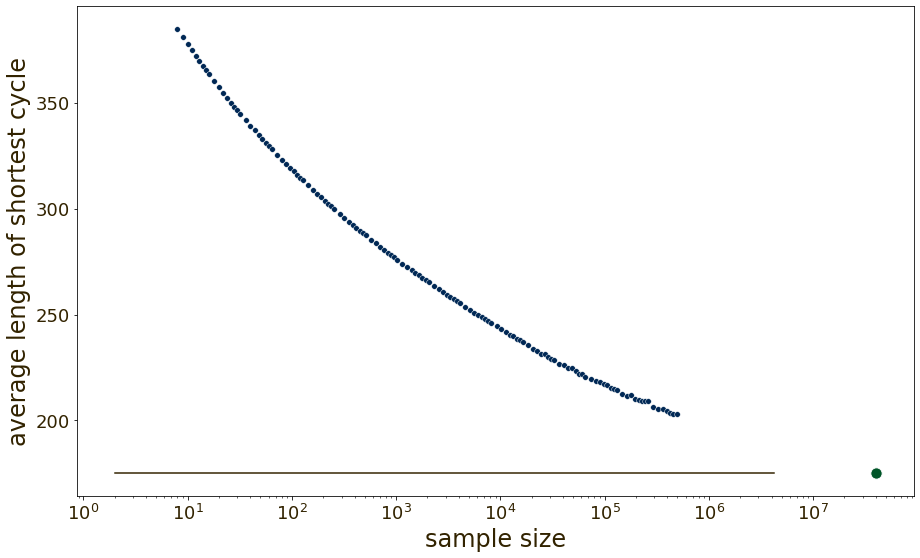

In [49]:
import seaborn as sbn
import matplotlib.pyplot as plt

vallist_random_cycles = [sum_of_minima[i] / count_of_minima[i] for i in sample_sizes]

fig, ax = plt.subplots()
fig.set_size_inches(15, 9)
plt.xticks(fontsize=18, color="#322300")
plt.yticks(fontsize=18, color="#322300")
ax.set_xlabel("sample size", fontsize=24, color="#322300")
ax.set_ylabel("average length of shortest cycle", fontsize=24, color="#322300")

sbn.scatterplot(x=sample_sizes, y=vallist_random_cycles, color='#002855', s=32)  # randomized outcome
sbn.scatterplot(x=[math.factorial(n-1)], \
                y=[salesman_travelling_distance], color='#005528', s=128)  # brute force
sbn.lineplot(x=[2, num_tests], y=[salesman_travelling_distance, salesman_travelling_distance], \
             color='#322300', ax=ax)  # black line at brute-force value for orientation
ax.set_xscale('log')